In [1]:
train_en = "D:/NITT-Materials/4 Sem/MCA_SEM_4_SEC_A_ALL_SUB_PPTS/MCA_SEM_4_SEC_A_ALL_SUB_PPTS/Project-Phase-1/MiniProject/archive/Eng_train.csv"
valid_en = "D:/NITT-Materials/4 Sem/MCA_SEM_4_SEC_A_ALL_SUB_PPTS/MCA_SEM_4_SEC_A_ALL_SUB_PPTS/Project-Phase-1/MiniProject/archive/Eng_val_article.csv"

In [2]:
!python -m pip install pytextrank
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/12.8 MB ? eta -:--:--
                                              0.1/12.8 MB 2.6 MB/s eta 0:00:05
                                              0.3/12.8 MB 3.4 MB/s eta 0:00:04
     -                                        0.5/12.8 MB 3.6 MB/s eta 0:00:04
     --                                       0.7/12.8 MB 3.9 MB/s eta 0:00:04
     --                                       0.9/12.8 MB 4.2 MB/s eta 0:00:03
     ---                                      1.2/12.8 MB 4.4 MB/s eta 0:00:03
     ----                                     1.4/12.8 MB 4.6 MB/s eta 0:00:03
     -----                                    1.7/12.8 MB 4.6 MB/s eta 0:00:03
     -----                                    1.9/12.8 MB 4.7 MB/s eta 0:00:03
     ------                                   2.0/12.8 MB 4.5 MB/s eta 0:00:03
     ------                                   2.2/12.8 MB 4.6 MB/s eta 0:00:03
     -------                                  2.4/12.8 MB 4


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from icecream import ic
import pandas as pd
import spacy
import pytextrank
nlp = spacy.load("en_core_web_sm")
# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
print(f"{nlp.pipe_names}")

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'textrank']


In [4]:
train_en = pd.read_csv(train_en)
valid_en = pd.read_csv(valid_en)
# Index(['id', 'Link', 'Heading', 'Summary', 'Article'], dtype='object')

In [5]:
valid_en

,id,Article
0,0e99444b1d4e7b8886582e371a6ce939,Pak PM Imran Khan expresses solidarity with In...
1,adfa04f5e1e7403dd90f5cddd29b6c37,"The Pentagon on Monday, June 18, 2018, formall..."
2,77d978318d3503fc6485c138ae3f3aa2,Taliban fighters patrol in the Wazir Akbar Kha...
3,973c4f387dc9f48e1be58608101bc3d6,A top official of American defence intelligen...
4,cb502ddb99c6a53d46b300027b4fe589,Boris Johnson's advisor under pressure over lo...
...,...,...
893,2d35a6dd7e95c0b381d83b46921376aa,"Coronavirus Updates April 29, 2020The total nu..."
894,4a6e69442ca27b86e188b6266cd38c06,It's important to get clear idea about source ...
895,0b29bed7ddd728e80ce31ca089a15175,'We saw them coming and cops disappeared': Ban...
896,da49da886e52aba9c54b7101038c31cb,Earthquake of 5.3 magnitude hits NepalAn Earth...


In [6]:
train_en

,id,Link,Heading,Summary,Article
0,3938f547c863630032649c54e611e6b0,https://www.indiatvnews.com/news/world/russia-...,"Russia Ukraine War: Mastercard, Visa suspend o...","Since the invasion of Ukraine, the value of th...",Logos for MasterCard and Visa credit cards at ...
1,1b336d62e9502c5b91b7afd3c7bcff46,https://www.indiatvnews.com/news/world-author-...,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...
2,082262f1c5a9e1112c39369403ff4e9a,https://www.indiatvnews.com/news/world/fumio-k...,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...
3,82cce3b894007faf93e567d751dd2aef,https://www.indiatvnews.com/news/world/pakista...,Pakistan Sikhs urge India to facilitate access...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...,The Sikh community of Pakistan has urged India...
4,4b3bbf58136527fff41adc6c2f37d73d,https://www.indiatvnews.com/news/world/london-...,London knife attack suspect was jailed for 6 y...,"The Police said the attacker, Usman Khan, was ...",Armed police at the scene of an incident on Lo...
...,...,...,...,...,...
12560,1f4dc11a672137f6f6cc33c9c1644040,https://www.indiatvnews.com/news/world-china-a...,China announces tariff hike on $75 billion of ...,Tariffs of 10 per cent and 5 per cent will tak...,China announces tariff hike on $75 billion of ...
12561,963b9f0a8d88948857626afb9f185d2c,https://www.indiatvnews.com/news/world-iran-sa...,Iran says ‘idiotic’ new US sanctions shut door...,Iran warned Tuesday that new U.S. sanctions ta...,Iran says ‘idiotic’ new US sanctions shut door...
12562,0c52632fe53e8671377c4873f64c2957,https://www.indiatvnews.com/news/world/coronav...,Chinese COVID-19 vaccine BBIBP-CorV shows prom...,A previous clinical trial reported similar res...,Chinese COVID-19 vaccine BBIBP-CorV shows prom...
12563,bee435262d4db4c94bf3cb5976bd7e15,https://www.indiatvnews.com/news/world/russia-...,"Ukrainian women including MPs, Miss Universe p...",Former Miss Universe Anastasiia Lenna also sha...,"Miss Universe Anastasiia Lenna (L), Ukranian M..."


### Testing for a single item

In [7]:
text = train_en["Article"][0]

len(text)

2872

In [8]:
text

'Logos for MasterCard and Visa credit cards at the entrance of a New York coffee shopIn the latest blow to Russia’s financial system after its invasion of Ukraine, Mastercard and Visa said they are suspending their operations in the country. Mastercard said cards issued by Russian banks will no longer be supported by its network and any Mastercard issued outside the country will not work at Russian stores or ATMs.“We don’t take this decision lightly,” Mastercard said in a statement, adding that it made the move after discussions with customers, partners and governments.Visa said it’s working with clients and partners in Russia to cease all Visa transactions over the coming days.“We are compelled to act following Russia’s unprovoked invasion of Ukraine, and the unacceptable events that we have witnessed,” Visa Chairman and Chief Executive Officer Al Kelly said in a statement.The twin suspensions were announced within 16 minutes of each other, and they followed a private video call earli

In [10]:
train_en['Article']

0        Logos for MasterCard and Visa credit cards at ...
1        Author-Diplomat Vikas Swarup moved to Delhi as...
2        Japan’s ex-top diplomat Fumio Kishida to becom...
3        The Sikh community of Pakistan has urged India...
4        Armed police at the scene of an incident on Lo...
                               ...                        
12560    China announces tariff hike on $75 billion of ...
12561    Iran says ‘idiotic’ new US sanctions shut door...
12562    Chinese COVID-19 vaccine BBIBP-CorV shows prom...
12563    Miss Universe Anastasiia Lenna (L), Ukranian M...
12564    China, which is constructing many hydropower p...
Name: Article, Length: 12565, dtype: object

In [12]:
doc = nlp(text)

# examine the top-ranked phrases in the document
for p in doc._.phrases:
    ic(p.rank, p.count, p.text)
    ic(p.chunks)

ic| p.rank: 0.0948435003423886, p.count: 1, p.text: 'Visa Chairman'
ic| p.chunks: [Visa Chairman]
ic| p.rank: 0.09473206196669667, p.count: 20, p.text: 'Visa'
ic| p.chunks: [Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa,
               Visa]
ic| p.rank: 0.08053460965640433
    p.count: 1
    p.text: 'Russian companies'
ic| p.chunks: [Russian companies]
ic| p.rank: 0.07954722195545055, p.count: 13, p.text: 'Russia'
ic| p.chunks: [Russia,
               Russia,
               Russia,
               Russia,
               Russia,
               Russia,
               Russia,
               Russia,
               Russia,
               Russia,
               

### Step:Construct a graph and Construct a list of the sentence boundaries with a phrase vector (initialized to empty set) for each...

In [15]:
import networkx as nx

def increment_edge (graph, node0, node1):
    ic(node0, node1)

    if graph.has_edge(node0, node1):
        graph[node0][node1]["weight"] += 1.0
    else:
        graph.add_edge(node0, node1, weight=1.0)

In [16]:
POS_KEPT = ["ADJ", "NOUN", "PROPN", "VERB"]

def link_sentence (doc, sent, lemma_graph, seen_lemma):
    visited_tokens = []
    visited_nodes = []

    for i in range(sent.start, sent.end):
        token = doc[i]

        if token.pos_ in POS_KEPT:
            key = (token.lemma_, token.pos_)

            if key not in seen_lemma:
                seen_lemma[key] = set([token.i])
            else:
                seen_lemma[key].add(token.i)

            node_id = list(seen_lemma.keys()).index(key)

            if not node_id in lemma_graph:
                lemma_graph.add_node(node_id)

            ic(visited_tokens, visited_nodes)
            ic(list(range(len(visited_tokens) - 1, -1, -1)))

            for prev_token in range(len(visited_tokens) - 1, -1, -1):
                ic(prev_token, (token.i - visited_tokens[prev_token]))

                if (token.i - visited_tokens[prev_token]) <= 3:
                    increment_edge(lemma_graph, node_id, visited_nodes[prev_token])
                else:
                    break

            ic(token.i, token.text, token.lemma_, token.pos_, visited_tokens, visited_nodes)

            visited_tokens.append(token.i)
            visited_nodes.append(node_id)


In [17]:
lemma_graph = nx.Graph()
seen_lemma = {}

for sent in doc.sents:
    link_sentence(doc, sent, lemma_graph, seen_lemma)
    #break # only test one sentence


ic| visited_tokens: [], visited_nodes: []
ic| list(range(len(visited_tokens) - 1, -1, -1)): []
ic| token.i: 0
    token.text: 'Logos'
    token.lemma_: 'Logos'
    token.pos_: 'PROPN'
    visited_tokens: []
    visited_nodes: []
ic| visited_tokens: [0], visited_nodes: [0]
ic| list(range(len(visited_tokens) - 1, -1, -1)): [0]
ic| prev_token: 0, token.i - visited_tokens[prev_token]: 2
ic| node0: 1, node1: 0
ic| token.i: 2
    token.text: 'MasterCard'
    token.lemma_: 'MasterCard'
    token.pos_: 'PROPN'
    visited_tokens: [0]
    visited_nodes: [0]
ic| visited_tokens: [0, 2], visited_nodes: [0, 1]
ic| list(range(len(visited_tokens) - 1, -1, -1)): [1, 0]
ic| prev_token: 1, token.i - visited_tokens[prev_token]: 2
ic| node0: 2, node1: 1
ic| prev_token: 0, token.i - visited_tokens[prev_token]: 4
ic| token.i: 4
    token.text: 'Visa'
    token.lemma_: 'Visa'
    token.pos_: 'PROPN'
    visited_tokens: [0, 2]
    visited_nodes: [0, 1]
ic| visited_tokens: [0, 2, 4], visited_nodes: [0, 1, 2]
i

In [18]:
ic(seen_lemma)

ic| seen_lemma: {('%', 'NOUN'): {489, 466, 436, 511},
                 ('-', 'ADJ'): {457},
                 ('Al', 'PROPN'): {154},
                 ('Bennett', 'PROPN'): {529},
                 ('Brad', 'PROPN'): {213},
                 ('California', 'PROPN'): {219},
                 ('Chairman', 'PROPN'): {149},
                 ('Chief', 'PROPN'): {151},
                 ('Davidson', 'PROPN'): {384},
                 ('Democrat', 'PROPN'): {217},
                 ('Executive', 'PROPN'): {152},
                 ('Harley', 'PROPN'): {382},
                 ('Kelly', 'PROPN'): {155, 414},
                 ('Logos', 'PROPN'): {0},
                 ('MasterCard', 'PROPN'): {2, 205},
                 ('Mastercard', 'PROPN'): {480, 420, 231, 43, 83, 245, 60, 30},
                 ('Moscow', 'PROPN'): {533},
                 ('New', 'PROPN'): {12},
                 ('Officer', 'PROPN'): {153},
                 ('PM', 'PROPN'): {528},
                 ('President', 'PROPN'): {185},
       

{('Logos', 'PROPN'): {0},
 ('MasterCard', 'PROPN'): {2, 205},
 ('Visa', 'PROPN'): {4, 32, 104, 118, 148, 207, 233, 243, 412, 422, 440, 468},
 ('credit', 'NOUN'): {5},
 ('card', 'NOUN'): {6, 45},
 ('entrance', 'NOUN'): {9},
 ('New', 'PROPN'): {12},
 ('York', 'PROPN'): {13},
 ('coffee', 'NOUN'): {14},
 ('shopIn', 'PROPN'): {15},
 ('late', 'ADJ'): {17},
 ('blow', 'NOUN'): {18},
 ('Russia', 'PROPN'): {20, 114, 131, 209, 353, 432, 506, 522},
 ('financial', 'ADJ'): {22, 253, 278, 350},
 ('system', 'NOUN'): {23, 265},
 ('invasion', 'NOUN'): {26, 134, 290},
 ('Ukraine', 'PROPN'): {28, 136, 189, 292, 362, 461, 524, 536},
 ('Mastercard', 'PROPN'): {30, 43, 60, 83, 231, 245, 420, 480},
 ('say', 'VERB'): {33, 44, 84, 105, 156, 415, 469, 481},
 ('suspend', 'VERB'): {36},
 ('operation', 'NOUN'): {38},
 ('country', 'NOUN'): {41, 64, 390},
 ('issue', 'VERB'): {46, 61},
 ('russian', 'ADJ'): {48, 69, 267, 298, 322, 370},
 ('bank', 'NOUN'): {49},
 ('support', 'VERB'): {54},
 ('network', 'NOUN'): {57, 257

In [19]:
labels = {}
keys = list(seen_lemma.keys())

for i in range(len(seen_lemma)):
    labels[i] = keys[i][0].lower()

labels


{0: 'logos',
 1: 'mastercard',
 2: 'visa',
 3: 'credit',
 4: 'card',
 5: 'entrance',
 6: 'new',
 7: 'york',
 8: 'coffee',
 9: 'shopin',
 10: 'late',
 11: 'blow',
 12: 'russia',
 13: 'financial',
 14: 'system',
 15: 'invasion',
 16: 'ukraine',
 17: 'mastercard',
 18: 'say',
 19: 'suspend',
 20: 'operation',
 21: 'country',
 22: 'issue',
 23: 'russian',
 24: 'bank',
 25: 'support',
 26: 'network',
 27: 'work',
 28: 'store',
 29: 'atm',
 30: '“we',
 31: 'take',
 32: 'decision',
 33: 'statement',
 34: 'add',
 35: 'make',
 36: 'move',
 37: 'discussion',
 38: 'customer',
 39: 'partner',
 40: 'government',
 41: 'client',
 42: 'cease',
 43: 'transaction',
 44: 'come',
 45: 'day',
 46: '“we',
 47: 'compel',
 48: 'act',
 49: 'follow',
 50: 'unprovoked',
 51: 'unacceptable',
 52: 'event',
 53: 'witness',
 54: 'chairman',
 55: 'chief',
 56: 'executive',
 57: 'officer',
 58: 'al',
 59: 'kelly',
 60: 'twin',
 61: 'suspension',
 62: 'announce',
 63: 'minute',
 64: 'other',
 65: 'private',
 66: 'video

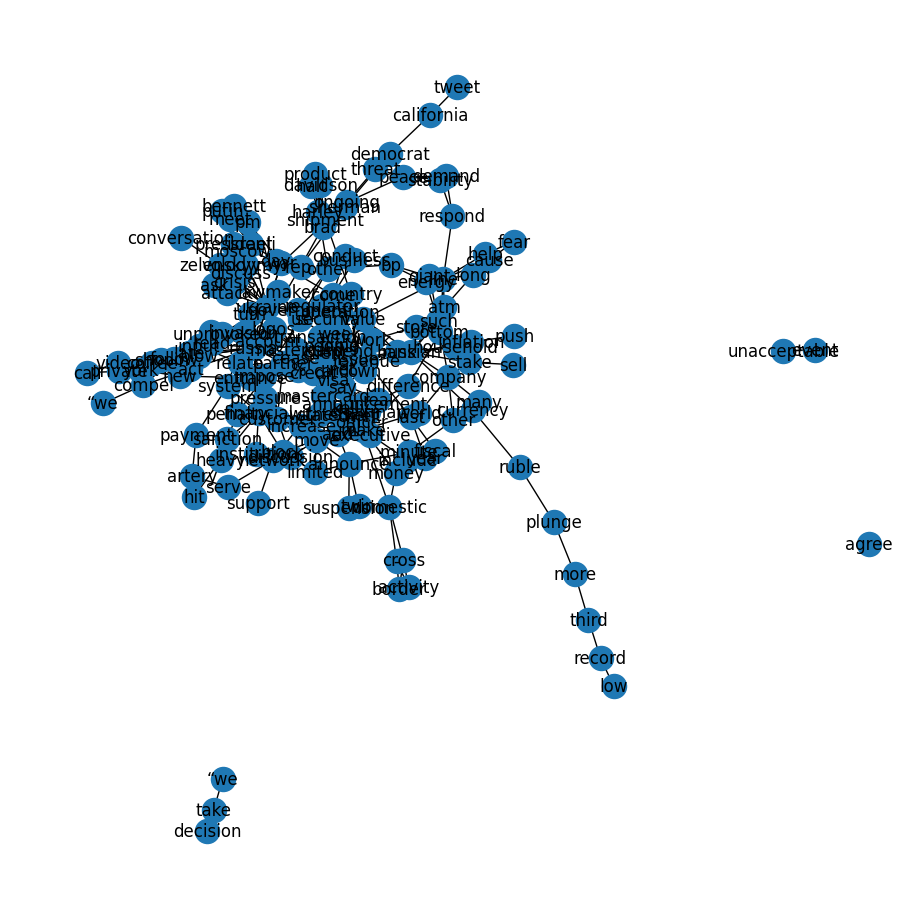

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(lemma_graph)

nx.draw(lemma_graph, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(lemma_graph, pos, labels);


To calculate ranks for each of the nodes in the lemma graph, we use PageRank - a form of eigenvector centrality - algorithm.

In [21]:
ranks = nx.pagerank(lemma_graph)
ranks


{0: 0.002101456546666126,
 1: 0.007236103289547383,
 2: 0.030468274789122608,
 3: 0.0040269060138136544,
 4: 0.008239707283363993,
 5: 0.0031358103090087016,
 6: 0.005947969390411909,
 7: 0.0045812068316497855,
 8: 0.0058332429887522266,
 9: 0.0070963719969845615,
 10: 0.005616904057193201,
 11: 0.004340989901141139,
 12: 0.025169252614551375,
 13: 0.015413010140849141,
 14: 0.0057483241031987,
 15: 0.007410564059834684,
 16: 0.02202388723897922,
 17: 0.01797372213583929,
 18: 0.021995468527454796,
 19: 0.0032438184767699086,
 20: 0.0034875824544292372,
 21: 0.0058242662972327495,
 22: 0.008270928468196315,
 23: 0.01938003748180339,
 24: 0.003052215278425587,
 25: 0.002315671509576,
 26: 0.006797126831542175,
 27: 0.006862817805156679,
 28: 0.004437209369753576,
 29: 0.00575338358879671,
 30: 0.004462560733559797,
 31: 0.008501541326955341,
 32: 0.004462560733559797,
 33: 0.003734599316422415,
 34: 0.003821447143977947,
 35: 0.016360722914410607,
 36: 0.011051596700737753,
 37: 0.00347

In [22]:
for node_id, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True):
    ic(node_id, rank, labels[node_id])


ic| node_id: 2, rank: 0.030468274789122608, labels[node_id]: 'visa'
ic| node_id: 12, rank: 0.025169252614551375, labels[node_id]: 'russia'
ic| node_id: 16, rank: 0.02202388723897922, labels[node_id]: 'ukraine'
ic| node_id: 18, rank: 0.021995468527454796, labels[node_id]: 'say'
ic| node_id: 23, rank: 0.01938003748180339, labels[node_id]: 'russian'
ic| node_id: 17
    rank: 0.01797372213583929
    labels[node_id]: 'mastercard'
ic| node_id: 35, rank: 0.016360722914410607, labels[node_id]: 'make'
ic| node_id: 13
    rank: 0.015413010140849141
    labels[node_id]: 'financial'
ic| node_id: 36, rank: 0.011051596700737753, labels[node_id]: 'move'
ic| node_id: 71, rank: 0.010588329510229144, labels[node_id]: 'us'
ic| node_id: 113, rank: 0.009876761851647336, labels[node_id]: 'line'
ic| node_id: 115
    rank: 0.00932903664708852
    labels[node_id]: 'company'
ic| node_id: 49, rank: 0.009017015865225016, labels[node_id]: 'follow'
ic| node_id: 62
    rank: 0.008670671954322567
    labels[node_id]:

Define a function to collect the top-ranked phrases from the lemma graph.

In [25]:
import math

def collect_phrases (chunk, phrases, counts):
    chunk_len = chunk.end - chunk.start
    sq_sum_rank = 0.0
    non_lemma = 0
    compound_key = set([])

    for i in range(chunk.start, chunk.end):
        token = doc[i]
        key = (token.lemma_, token.pos_)

        if key in seen_lemma:
            node_id = list(seen_lemma.keys()).index(key)
            rank = ranks[node_id]
            sq_sum_rank += rank
            compound_key.add(key)

            ic(token.lemma_, token.pos_, node_id, rank)
        else:
            non_lemma += 1

    # although the noun chunking is greedy, we discount the ranks using a
    # point estimate based on the number of non-lemma tokens within a phrase
    non_lemma_discount = chunk_len / (chunk_len + (2.0 * non_lemma) + 1.0)

    # use root mean square (RMS) to normalize the contributions of all the tokens
    phrase_rank = math.sqrt(sq_sum_rank / (chunk_len + non_lemma))
    phrase_rank *= non_lemma_discount

    # remove spurious punctuation
    phrase = chunk.text.lower().replace("'", "")

    # create a unique key for the the phrase based on its lemma components
    compound_key = tuple(sorted(list(compound_key)))

    if not compound_key in phrases:
        phrases[compound_key] = set([ (phrase, phrase_rank) ])
        counts[compound_key] = 1
    else:
        phrases[compound_key].add( (phrase, phrase_rank) )
        counts[compound_key] += 1

    ic(phrase_rank, chunk.text, chunk.start, chunk.end, chunk_len, counts[compound_key])


Collect the top-ranked phrases based on both the noun chunks and the named entities...Using Eigen vectors

In [26]:
phrases = {}
counts = {}

for chunk in doc.noun_chunks:
    collect_phrases(chunk, phrases, counts)


ic| token.lemma_: 'Logos'
    token.pos_: 'PROPN'
    node_id: 0
    rank: 0.002101456546666126
ic| phrase_rank: 0.022920823210926162
    chunk.text: 'Logos'
    chunk.start: 0
    chunk.end: 1
    chunk_len: 1
    counts[compound_key]: 1
ic| token.lemma_: 'MasterCard'
    token.pos_: 'PROPN'
    node_id: 1
    rank: 0.007236103289547383
ic| phrase_rank: 0.042532644196979406
    chunk.text: 'MasterCard'
    chunk.start: 2
    chunk.end: 3
    chunk_len: 1
    counts[compound_key]: 1
ic| token.lemma_: 'Visa'
    token.pos_: 'PROPN'
    node_id: 2
    rank: 0.030468274789122608
ic| phrase_rank: 0.08727581965974683
    chunk.text: 'Visa'
    chunk.start: 4
    chunk.end: 5
    chunk_len: 1
    counts[compound_key]: 1
ic| token.lemma_: 'credit'
    token.pos_: 'NOUN'
    node_id: 3
    rank: 0.0040269060138136544
ic| token.lemma_: 'card'
    token.pos_: 'NOUN'
    node_id: 4
    rank: 0.008239707283363993
ic| phrase_rank: 0.05221028697526453
    chunk.text: 'credit cards'
    chunk.start: 

In [27]:
for ent in doc.ents:
    collect_phrases(ent, phrases, counts)

ic| token.lemma_: 'Logos'
    token.pos_: 'PROPN'
    node_id: 0
    rank: 0.002101456546666126
ic| phrase_rank: 0.022920823210926162
    chunk.text: 'Logos'
    chunk.start: 0
    chunk.end: 1
    chunk_len: 1
    counts[compound_key]: 2
ic| token.lemma_: 'MasterCard'
    token.pos_: 'PROPN'
    node_id: 1
    rank: 0.007236103289547383
ic| phrase_rank: 0.042532644196979406
    chunk.text: 'MasterCard'
    chunk.start: 2
    chunk.end: 3
    chunk_len: 1
    counts[compound_key]: 3
ic| token.lemma_: 'Visa'
    token.pos_: 'PROPN'
    node_id: 2
    rank: 0.030468274789122608
ic| phrase_rank: 0.08727581965974683
    chunk.text: 'Visa'
    chunk.start: 4
    chunk.end: 5
    chunk_len: 1
    counts[compound_key]: 10
ic| token.lemma_: 'New'
    token.pos_: 'PROPN'
    node_id: 6
    rank: 0.005947969390411909
ic| token.lemma_: 'York'
    token.pos_: 'PROPN'
    node_id: 7
    rank: 0.0045812068316497855
ic| phrase_rank: 0.048371654284673084
    chunk.text: 'New York'
    chunk.start: 12


Since noun chunks can be expressed in different ways (e.g., they may have articles or prepositions), we need to find a minimum span for each phrase based on combinations of lemmas...

In [ ]:
import operator

min_phrases = {}

for compound_key, rank_tuples in phrases.items():
    l = list(rank_tuples)
    l.sort(key=operator.itemgetter(1), reverse=True)

    phrase, rank = l[0]
    count = counts[compound_key]

    min_phrases[phrase] = (rank, count)


In [30]:
for phrase, (rank, count) in sorted(min_phrases.items(), key=lambda x: x[1][0], reverse=True):
    ic(phrase, count, rank)


ic| phrase: 'visa', count: 20, rank: 0.08727581965974683
ic| phrase: 'visa chairman', count: 1, rank: 0.08718519341639043
ic| phrase: 'russian companies', count: 1, rank: 0.07987361423439451
ic| phrase: 'russia', count: 13, rank: 0.07932410197183352
ic| phrase: 'ukraine crisis', count: 1, rank: 0.07480440529611511
ic| phrase: 'ukraine', count: 12, rank: 0.07420223588103532
ic| phrase: 'russian stores', count: 1, rank: 0.07275109293040355
ic| phrase: 'russian households', count: 1, rank: 0.07157122608090422
ic| phrase: 'russian people', count: 1, rank: 0.07070693590015728
ic| phrase: 'russian banks', count: 1, rank: 0.07060414334745986
ic| phrase: 'russian', count: 6, rank: 0.06960610153176838
ic| phrase: 'mastercard', count: 16, rank: 0.06703305553202706
ic| phrase: 'financial institutions'
    count: 1
    rank: 0.06665877195110176
ic| phrase: 'financial penalties', count: 1, rank: 0.06661191637361633
ic| phrase: 'chief executive officer al kelly'
    count: 1
    rank: 0.063437281410

In [13]:
# sentence boundaries
sent_bounds = [ [s.start, s.end, set([])] for s in doc.sents ]
sent_bounds

[[0, 43, set()],
 [43, 74, set()],
 [74, 104, set()],
 [104, 125, set()],
 [125, 161, set()],
 [161, 194, set()],
 [194, 223, set()],
 [223, 238, set()],
 [238, 267, set()],
 [267, 288, set()],
 [288, 316, set()],
 [316, 337, set()],
 [337, 364, set()],
 [364, 392, set()],
 [392, 417, set()],
 [417, 432, set()],
 [432, 461, set()],
 [461, 480, set()],
 [480, 508, set()],
 [508, 538, set()]]

### Step: Iterate through the top-ranked phrases, add them to the phrase vector for each sentence...


In [14]:
limit_phrases = 4

def get_top_phrases_vector(limit_phrases, doc, sent_bounds):
    phrase_id = 0
    unit_vector = []

    for p in doc._.phrases:
#         ic(phrase_id, p.text, p.rank)

        unit_vector.append(p.rank)

        for chunk in p.chunks:
#             ic(chunk.start, chunk.end)

            for sent_start, sent_end, sent_vector in sent_bounds:
                if chunk.start >= sent_start and chunk.end <= sent_end:
#                     ic(sent_start, chunk.start, chunk.end, sent_end)
                    sent_vector.add(phrase_id)
                    break

        phrase_id += 1

        if phrase_id == limit_phrases:
            break
    return unit_vector, sent_bounds

unit_vector, sent_bounds = get_top_phrases_vector(limit_phrases, doc, sent_bounds)

### Step: We also construct a unit_vector for all of the phrases, up to the limit requested...


In [16]:
unit_vector

[0.0948435003423886,
 0.09473206196669667,
 0.08053460965640433,
 0.07954722195545055]

In [17]:
def normalize(unit_vector):
    sum_ranks = sum(unit_vector)

    unit_vector = [ rank/sum_ranks for rank in unit_vector ]
    return unit_vector
unit_vector = normalize(unit_vector)

### Iterate through each sentence, calculating its euclidean distance from the unit vector...



In [18]:
from math import sqrt

def calc_eucliden_dist_from_unit_vector(sent_bounds, unit_vector):
    sent_rank = {}
    sent_id = 0

    for sent_start, sent_end, sent_vector in sent_bounds:
#         ic(sent_vector)
        sum_sq = 0.0
        for phrase_id in range(len(unit_vector)):
    #         ic(phrase_id, unit_vector[phrase_id])

            if phrase_id not in sent_vector:
                sum_sq += unit_vector[phrase_id]**2.0

        sent_rank[sent_id] = sqrt(sum_sq)
        sent_id += 1
    return sent_rank
sent_rank = calc_eucliden_dist_from_unit_vector(sent_bounds, unit_vector)

In [19]:
# Assuming sent_rank is already calculated
print("Sentence Rankings:")
for sent_id, rank in sent_rank.items():
    print(f"Sentence {sent_id}: Rank {rank}")


Sentence Rankings:
Sentence 0: Rank 0.3558429555390147
Sentence 1: Rank 0.501779617123909
Sentence 2: Rank 0.501779617123909
Sentence 3: Rank 0.3558429555390147
Sentence 4: Rank 0.23032434336170146
Sentence 5: Rank 0.501779617123909
Sentence 6: Rank 0.3558429555390147
Sentence 7: Rank 0.4223513626199158
Sentence 8: Rank 0.4223513626199158
Sentence 9: Rank 0.501779617123909
Sentence 10: Rank 0.501779617123909
Sentence 11: Rank 0.501779617123909
Sentence 12: Rank 0.4472430208073215
Sentence 13: Rank 0.4457953353457365
Sentence 14: Rank 0.4223513626199158
Sentence 15: Rank 0.4223513626199158
Sentence 16: Rank 0.3558429555390147
Sentence 17: Rank 0.4223513626199158
Sentence 18: Rank 0.4472430208073215
Sentence 19: Rank 0.4472430208073215


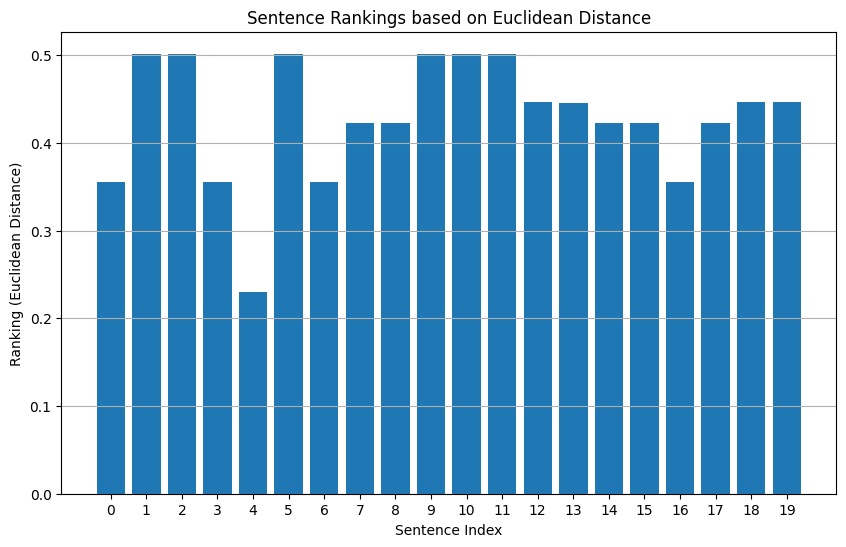

In [20]:
import matplotlib.pyplot as plt


# Plotting the graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Extracting sentence indices and their rankings from sent_rank
sent_indices = list(sent_rank.keys())
sent_rankings = list(sent_rank.values())

# Plotting the rankings
plt.bar(sent_indices, sent_rankings)
plt.xlabel('Sentence Index')
plt.ylabel('Ranking (Euclidean Distance)')
plt.title('Sentence Rankings based on Euclidean Distance')
plt.xticks(sent_indices)  # Set x-axis ticks to sentence indices
plt.grid(axis='y')  # Show gridlines on the y-axis

plt.show()


### Sort the sentence indexes in descending order



### Extract the sentences with the lowest distance, up to the limit requested...



In [21]:
from operator import itemgetter
limit_sentences = 5
def fetch_sentences_upto_limit(limit_sentences, sent_rank, sent_text):
    num_sent = 0
    res = []
    for sent_id, rank in sorted(sent_rank.items(), key=itemgetter(1)):
#         ic(sent_id, sent_text[sent_id])
        num_sent += 1
        res.append((sent_id, sent_text[sent_id]))
        if num_sent == limit_sentences:
            return res
            break

In [22]:
sent_text = {}
sent_id = 0
for sent in doc.sents:
    sent_text[sent_id] = sent.text
    sent_id += 1
final_res = fetch_sentences_upto_limit(limit_sentences, sent_rank, sent_text)

# Print each sentence of the summary
for sent_id, sentence in final_res:
    print(len(sentence),sentence) 

200 “We are compelled to act following Russia’s unprovoked invasion of Ukraine, and the unacceptable events that we have witnessed,” Visa Chairman and Chief Executive Officer Al Kelly said in a statement.
240 Logos for MasterCard and Visa credit cards at the entrance of a New York coffee shopIn the latest blow to Russia’s financial system after its invasion of Ukraine, Mastercard and Visa said they are suspending their operations in the country.
111 Visa said it’s working with clients and partners in Russia to cease all Visa transactions over the coming days.
146 During that conversation, Zelenskyy “asked us to turn off MasterCard and Visa for Russia,” Rep. Brad Sherman, a Democrat from California, tweeted.
141 Russia accounted for 4% of all of Visa’s net revenue in its last fiscal year, including money made from domestic and cross-border activities.


### Define the metric
Standard ROUGE metrics Rouge-1, Rouge-2 and Rouge-4 F-scores will be used for evaluation.


In [23]:
!pip install rouge

In [24]:
from rouge import Rouge
ROUGE = Rouge()

In [26]:
def fetch_fscores(prediction, reference):
    rouge_res = ROUGE.get_scores(prediction, reference)[0]
    fscores = [rouge_res["rouge-1"]["f"], rouge_res["rouge-2"]["f"], rouge_res["rouge-l"]["f"]]
    return fscores

In [27]:
reference = train_en["Summary"][0]
prediction = final_res[0][1]
ic(reference, prediction)
fetch_fscores(prediction, reference)

ic| reference: ('Since the invasion of Ukraine, the value of the Russian currency, the ruble, '
                'has plunged by more than a third to a record low.')
    prediction: ('“We are compelled to act following Russia’s unprovoked invasion of Ukraine, '
                 'and the unacceptable events that we have witnessed,” Visa Chairman and Chief '
                 'Executive Officer Al Kelly said in a statement.')


[0.24489795443565188, 0.07547169320042753, 0.20408162790503967]

### Run PyTextRank on dataset

In [28]:
train_en.head(3)

,id,Link,Heading,Summary,Article
0,3938f547c863630032649c54e611e6b0,https://www.indiatvnews.com/news/world/russia-...,"Russia Ukraine War: Mastercard, Visa suspend o...","Since the invasion of Ukraine, the value of th...",Logos for MasterCard and Visa credit cards at ...
1,1b336d62e9502c5b91b7afd3c7bcff46,https://www.indiatvnews.com/news/world-author-...,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...
2,082262f1c5a9e1112c39369403ff4e9a,https://www.indiatvnews.com/news/world/fumio-k...,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...


In [29]:
from tqdm import tqdm
limit_phrases = 10
limit_sentences = 1
df = train_en
final_fscores = []
for i in tqdm(range(len(df))):
    text, summary = df["Article"][i],df["Summary"][i]
    doc = nlp(text)
    sent_bounds = [ [s.start, s.end, set([])] for s in doc.sents ]
    unit_vector, sent_bounds = get_top_phrases_vector(limit_phrases, doc, sent_bounds)
    unit_vector = normalize(unit_vector)
    sent_rank = calc_eucliden_dist_from_unit_vector(sent_bounds, unit_vector)
    sent_text = {}
    sent_id = 0
    for sent in doc.sents:
        sent_text[sent_id] = sent.text
        sent_id += 1
    result = fetch_sentences_upto_limit(limit_sentences, sent_rank, sent_text)
    fscore = fetch_fscores(summary, result[0][1])
    final_fscores.append(fscore)

In [ ]:
[sum(i)/len(train_en) for i in zip(*final_fscores)]

[0.3175260855671334, 0.1963024513328657, 0.2848374587684367]